In [1]:
import os
import util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
projects = util.select_projects_from_libraries_io()
libraries = util.select_libraries_from_libraries_io()
lib_names = set(libraries["name"])
dep_changes = util.select_dependency_changes_all()
print(f"{len(dep_changes)} dep changes")

3329249 dep changes


In [3]:
dep_changes.head()

,project,commit,file,type,lib1,lib2,ver1,ver2
0,Snailclimb/JavaGuide,e8aeaef43cbfb2b8a9b71c7b7f462c48b4adb9a6,docs/dataStructures-algorithms/source code/sec...,add,,commons-codec:commons-codec,,1.8
1,Snailclimb/JavaGuide,e8aeaef43cbfb2b8a9b71c7b7f462c48b4adb9a6,docs/dataStructures-algorithms/source code/sec...,add,,junit:junit,,4.12
2,Snailclimb/JavaGuide,e8aeaef43cbfb2b8a9b71c7b7f462c48b4adb9a6,docs/dataStructures-algorithms/source code/sec...,add,,org.bouncycastle:bcprov-jdk15on,,1.56
3,Snailclimb/JavaGuide,a17a2800c92f918842d26a9e9261ae0bba89286d,数据结构与算法/source code/securityAlgorithm/pom.xml,add,,commons-codec:commons-codec,,1.8
4,Snailclimb/JavaGuide,a17a2800c92f918842d26a9e9261ae0bba89286d,数据结构与算法/source code/securityAlgorithm/pom.xml,add,,junit:junit,,3.8.1


In [4]:
proj2commits = dict(zip(projects.nameWithOwner, projects.commitsCount))
proj_stats = dict()
for proj, df in dep_changes.groupby(["project"]):
    proj_stats[proj] = {
        "project": proj,
        "changes": len(df),
        "adoptions": len(df[df.type == "add"]),
        "removals": len(df[df.type == "rem"]),
        "verchgs": len(df[df.type == "verchg"]),
        "commits": proj2commits[proj],
        "change_commits": len(set(df.commit)),
        "adoption_commits": len(set(df[df.type == "add"].commit)),
        "removal_commits": len(set(df[df.type == "rem"].commit)),
        "verchg_commits": len(set(df[df.type == "verchg"].commit))
    }
proj_stats = pd.DataFrame(proj_stats.values())

In [5]:
print(f"{len(proj_stats[proj_stats.removals == 0])} projects without lib removals")
print(f"{len(proj_stats[proj_stats.verchgs == 0])} projects without verchgs")
print(proj_stats[proj_stats.removals == 0].commits.describe())
print(proj_stats[proj_stats.removals != 0].commits.describe())

10329 projects without lib removals
9508 projects without verchgs
count     10329.000000
mean        527.322296
std        4103.265962
min           1.000000
25%          18.000000
50%          59.000000
75%         200.000000
max      164434.000000
Name: commits, dtype: float64
count      8583.000000
mean       2095.379937
std        7040.263075
min           2.000000
25%         121.000000
50%         388.000000
75%        1367.500000
max      225489.000000
Name: commits, dtype: float64


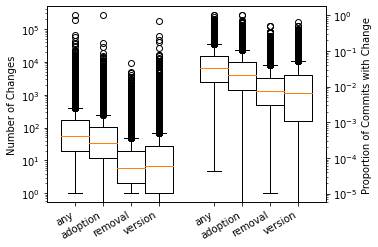

In [6]:
proj_stats_f = proj_stats[proj_stats.removals != 0]
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.boxplot(x=[
    proj_stats_f.changes,
    proj_stats_f.adoptions,
    proj_stats_f.removals,
    proj_stats_f.verchgs],
    labels=["any", "adoption", "removal", "version"], 
    positions=[0,0.5,1,1.5], widths=0.5)
ax.set_yscale("log")
ax.set_ylabel("Number of Changes")
ax2 = ax.twinx()
ax2.boxplot(x=[
    proj_stats_f.change_commits / proj_stats_f.commits,
    proj_stats_f.adoption_commits / proj_stats_f.commits,
    proj_stats_f.removal_commits / proj_stats_f.commits,
    proj_stats_f.verchg_commits / proj_stats_f.commits,
    ], labels=["any", "adoption", "removal", "version"], positions=[2.5,3,3.5,4], widths=0.5)
ax2.set_yscale("log")
ax2.set_ylabel("Proportion of Commits with Change")
fig.autofmt_xdate()
fig.savefig("plots/depchgs.pdf", bbox_inches="tight")


In [7]:
proj_stats_f["commit_portion_c"] = proj_stats_f.change_commits / proj_stats_f.commits
proj_stats_f["commit_portion_a"] = proj_stats_f.adoption_commits / proj_stats_f.commits
proj_stats_f["commit_portion_r"] = proj_stats_f.removal_commits / proj_stats_f.commits
proj_stats_f["commit_portion_v"] = proj_stats_f.verchg_commits / proj_stats_f.commits
proj_stats_f[["changes", "adoptions", "removals", "verchgs", "commit_portion_c", "commit_portion_a", "commit_portion_r", "commit_portion_v"]].describe()

,changes,adoptions,removals,verchgs,commit_portion_c,commit_portion_a,commit_portion_r,commit_portion_v
count,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000
mean,364.922987,207.355587,38.219271,119.348130,0.060244,0.043147,0.016610,0.019294
std,3830.449277,2928.303482,190.967456,2189.013936,0.080219,0.066868,0.029031,0.037184
min,1.000000,0.000000,1.000000,0.000000,0.000042,0.000000,0.000010,0.000000
25%,19.000000,12.000000,2.000000,1.000000,0.013699,0.008277,0.003058,0.001055
50%,55.000000,34.000000,6.000000,7.000000,0.032787,0.020725,0.007576,0.006793
75%,165.000000,107.000000,20.000000,28.000000,0.072000,0.048027,0.017857,0.020984
max,263230.000000,260138.000000,9299.000000,174325.000000,1.000000,1.000000,0.500000,0.655709


In [8]:
proj_stats_f["retention"] = 1 - np.minimum(1, proj_stats_f.removals / np.maximum(1, proj_stats_f.adoptions))
proj_stats_f["retention"].describe()

count    8583.000000
mean        0.707559
std         0.259302
min         0.000000
25%         0.601996
50%         0.785925
75%         0.896552
max         0.999084
Name: retention, dtype: float64

In [9]:
lib_retention = defaultdict(lambda: [0, 0])
for type, lib1, lib2 in zip(dep_changes.type, dep_changes.lib1, dep_changes.lib2):
    if type == "add":
        lib_retention[lib2][1] += 1
    elif type == "rem":
        lib_retention[lib1][0] += 1
libraries["retention"] = libraries.name.map(lambda n: 1 - min(1, lib_retention[n][0] / max(1, lib_retention[n][1])))
libraries[libraries.name.isin(dep_changes["lib2"])]["retention"].describe()

count    12814.000000
mean         0.745489
std          0.268021
min          0.000000
25%          0.651663
50%          0.821429
75%          0.948914
max          1.000000
Name: retention, dtype: float64

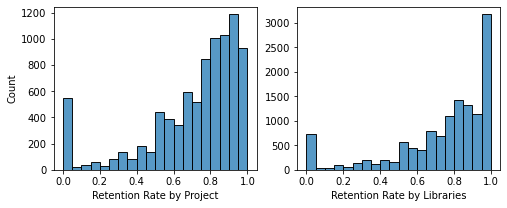

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
sns.histplot(data=proj_stats_f, x="retention", binwidth=0.05, ax=axes[0])
axes[0].set_xlabel("Retention Rate by Project")
sns.histplot(data=libraries[libraries.name.isin(dep_changes["lib2"])], x="retention", binwidth=0.05, ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("Retention Rate by Libraries")
fig.savefig("plots/retention.pdf", bbox_inches="tight")

In [11]:
proj_stats_f[proj_stats_f.retention == 0].describe()

,changes,adoptions,removals,verchgs,commits,change_commits,adoption_commits,removal_commits,verchg_commits,commit_portion_c,commit_portion_a,commit_portion_r,commit_portion_v,retention
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.0
mean,202.851852,37.562963,83.327778,81.961111,1096.687037,15.831481,6.475926,3.994444,8.183333,0.036078,0.016807,0.017724,0.016442,0.0
std,1498.891821,250.384324,531.808656,829.223317,2741.028040,66.082279,34.618319,12.770341,33.486044,0.056706,0.035559,0.033431,0.042547,0.0
min,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000042,0.000000,0.000039,0.000000,0.0
25%,3.000000,1.000000,1.000000,0.000000,84.500000,2.000000,1.000000,1.000000,0.000000,0.004890,0.000835,0.002564,0.000000,0.0
50%,8.000000,2.000000,3.000000,1.000000,285.000000,3.000000,1.000000,1.000000,1.000000,0.015019,0.005584,0.006547,0.001724,0.0
75%,24.000000,7.000000,11.000000,5.000000,933.000000,7.000000,3.000000,3.000000,3.000000,0.040000,0.015924,0.018521,0.012346,0.0
max,23787.000000,4514.000000,9299.000000,13314.000000,33165.000000,1217.000000,723.000000,236.000000,487.000000,0.500000,0.500000,0.500000,0.500000,0.0


In [12]:
proj_stats_f[proj_stats_f.retention == 0].head()

,project,changes,adoptions,removals,verchgs,commits,change_commits,adoption_commits,removal_commits,verchg_commits,commit_portion_c,commit_portion_a,commit_portion_r,commit_portion_v,retention
6,0xCopy/RelaxFactory,8,1,7,0,72,3,1,2,0,0.041667,0.013889,0.027778,0.000000,0.0
49,25/EnchantmentsEnhance,42,14,16,12,585,15,8,7,5,0.025641,0.013675,0.011966,0.008547,0.0
71,42Lines/wicket-bean-validation,9,3,3,3,27,3,1,1,3,0.111111,0.037037,0.037037,0.111111,0.0
123,ACRA/acra,5,2,2,1,1625,4,1,2,1,0.002462,0.000615,0.001231,0.000615,0.0
143,ATLauncher/ATLauncher,10,5,5,0,2180,6,3,3,0,0.002752,0.001376,0.001376,0.000000,0.0
